In [3]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_heart = pd.read_csv("heart.csv")
df_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


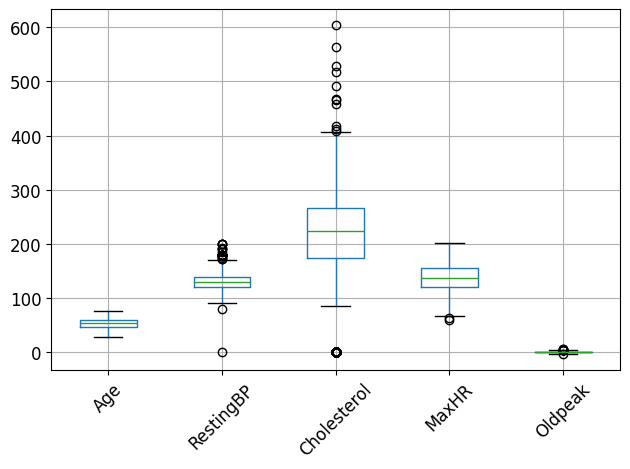

In [ ]:
#Detect outlier visually
numeric_cols = ["Age","RestingBP","Cholesterol",'MaxHR','Oldpeak']
df_heart[numeric_cols].boxplot(fontsize=12,rot=45)
plt.tight_layout()
plt.show()


In [ ]:
#Detect outlier Numerically
col = "Cholesterol"
Q1 = df_heart[col].quantile(0.25)
Q3 = df_heart[col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df_heart[(df_heart[col] < lower) | (df_heart[col] > upper)]
print(len(outliers))
outliers

183


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


In [25]:
#Remove outliers
df_no_outliers = df_heart[(df_heart[col] >= lower) & (df_heart[col] <= upper)]

#Cap outliers(Like winsorization approach)
df_caped = df_heart.copy()
df_caped[col] = df_heart[col].clip(lower,upper)

#Log Transform the column(for skewed data)
df_log = df_heart.copy()
df_log["log"] = nm.log(df_log[col]+1)

print(len(df_no_outliers))
print(len(df_caped))
print(df_log)


735
918
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease       log  
0      17

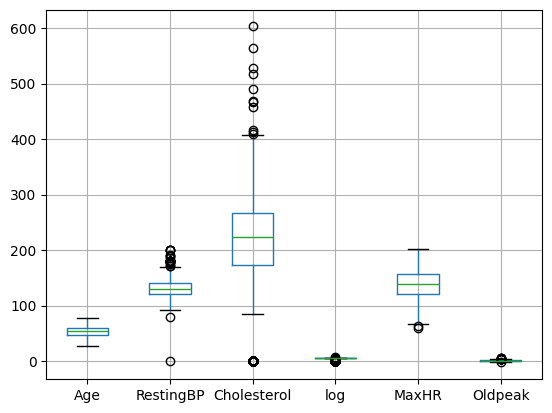

In [37]:
numeric_cols = ["Age","RestingBP","Cholesterol","log",'MaxHR','Oldpeak']
df_log[numeric_cols].boxplot()
# df_caped[numeric_cols].boxplot()
# df_no_outliers[numeric_cols].boxplot()
plt.show()

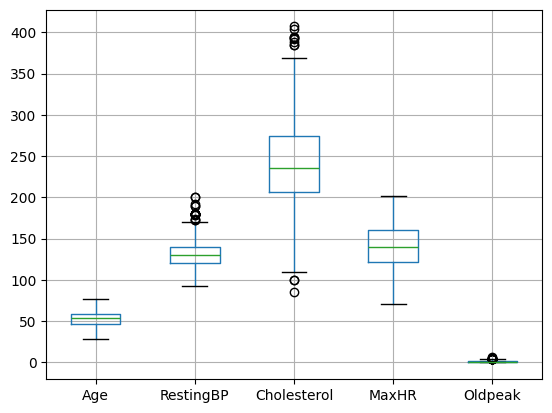

In [ ]:
#In this method even after remove outliers, some of outliers remain.This is very Normal case
df_no_outliers.boxplot(column=numeric_cols)
plt.show()